In [19]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [20]:
# ! pip install jupyterthemes

In [21]:
###### ! jt -t gruvboxd
# el preferido es "gruvboxd"
# Para cambiar el tema del Jupyter notebook https://www.youtube.com/watch?v=gjxrDf6Pp6M #### IMPORTANTE
# documentacion (https://github.com/dunovank/jupyter-t)

# Comienzo del codigo

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Aca Implementare El metodo de Jacobi 

<img src= "Recurrencia_jacobi.png" >

In [23]:
def jacobi(a,b,iteraciones=100):
    
    n = a.shape[0] # el tamaño de la matriz 
    kmax = iteraciones # sera el numero maximo de iteraciones
    delta = np.float64(10**(-10)) # Este valor se usara para evitar overfloats
    epsilon = np.float64(1/2*10**(-4)) # Para controlar la precision 
    lista_error = []
    
    x = np.zeros(shape = (n,1),dtype= np.float64)
    # haremos como maximo kmax iteraciones
    for k in range(0,kmax):
        # copy es para pasar una copia (recuerda que los arrays se pasan por referencia y no por valor)
        y = x.copy() # guradamos el x en una nueva variable
        
        # este "i" hara la cuenta de toda la filas de x_i
        for i in range(0,n):
            suma = b[i] # 
            # es necesario esto para ver si el elemnto no es muy pequeño
            # debemos evitar el overflow 
            diag = a[i][i] 
            # aca es donde entra en juego el delta
            if abs(diag) < delta:
                print(f"En operaciones puede ocurrir un overflow\n proceso interrumpido a {k} interaciones")
                break
            
            # si no hay posible overflow entonces se hace lo siguiente
            # como siempre "j" indica columnas . Recuerda eso 
            # haremos sum_{0}^{n}(en j) a[i][j]x[j]
            for j in range(0,n):
                # no se sumara cuando i == j 
                if j != i :
                    # podria hacer suma -= a[i][j]*y[j] , pero eso es peligroso
                    # hacer eso con listas trae problemas . si quieres intentalo y veras los errores 
                    # es una mala practica que aun no sabes por que se da :(
                    suma = suma - a[i][j]*y[j]
                    
            # este es el paso para hallar el x_{k+1}
            x[i] = suma/diag
    
        # https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
        # el enlace de arriba es para numpy.linalg.norm
        # debido a que hablamos de vectores para detener el proceso 
        # para una precision deseada usamos la norma
        

        # escojemos la norma 2 en este caso
        lista_error.append(np.linalg.norm(x-y))
        if np.linalg.norm(x-y) < epsilon:
            break
    
    print(f"se alcanzaron {k+1} iteraciones")
    print(f"la solucion a nuestro problema es \n {x}")
    
    return k,x,lista_error

In [24]:
A = np.array([[2,-1,0],[-1,3,-1],[0,-1,2]],dtype=np.float64)
b = np.array([[1],[8],[-5]],dtype=np.float64)
K,X,lista_error1 = jacobi(A,b)

se alcanzaron 22 iteraciones
la solucion a nuestro problema es 
 [[ 1.99999718]
 [ 2.99998306]
 [-1.00000282]]


# Aca implementare El metodo de Gauss-Seidel

<img src= "Recurrencia_jacobi_seidel.png" >

In [25]:
def gauss_seidel(a,b,iteraciones=100):
    
    n = a.shape[0] # el tamaño de la matriz 
    kmax = iteraciones # sera el numero maximo de iteraciones
    delta = np.float64(10**(-10)) # Este valor se usara para evitar overfloats
    epsilon = np.float64(1/2*10**(-4)) # Para controlar la precision 
    lista_error = []
    
    x = np.zeros(shape = (n,1),dtype= np.float64)
    # haremos como maximo kmax iteraciones
    for k in range(0,kmax):
        # copy es para pasar una copia (recuerda que los arrays se pasan por referencia y no por valor)
        y = x.copy() # guardamos el x en una nueva variable
        # este "i" hara la cuenta de toda la filas de x_i
        for i in range(0,n):
            suma = b[i] # 
            # es necesario esto para ver si el elemnto no es muy pequeño
            # debemos evitar el overflow 
            diag = a[i][i] 
            # aca es donde entra en juego el delta
            if abs(diag) < delta:
                print(f"En operaciones puede ocurrir un overflow\n proceso interrumpido a {k} interaciones")
                break
            
            # si no hay posible overflow entonces se hace lo siguiente
            # como siempre "j" indica columnas . Recuerda eso 
            
            # haremos sum_{0}^{n}(en j) a[i][j]x[j] pero con las dos formas , j<i y i<j
            for j in range(0,i):
                suma = suma - a[i][j]*x[j]
            for j in range(i+1,n):
                suma = suma - a[i][j]*y[j] 
            
            # este es el paso para hallar el x_{k+1}
            x[i] = suma/diag
    
        # https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
        # el enlace de arriba es para numpy.linalg.norm
        # debido a que hablamos de vectores para detener el proceso 
        # para una precision deseada usamos la norma
        

        # escojemos la norma 2 en este caso
        lista_error.append(np.linalg.norm(x-y))
        if np.linalg.norm(x-y) < epsilon:
            break
    
    print(f"se alcanzaron {k+1} iteraciones")
    print(f"la solucion a nuestro problema es \n {x}")
    
    return k,x,lista_error

In [26]:
A = np.array([[2,-1,0],[-1,3,-1],[0,-1,2]],dtype=np.float64)
b = np.array([[1],[8],[-5]],dtype=np.float64)
K,X,lista_error2 = gauss_seidel(A,b)

se alcanzaron 10 iteraciones
la solucion a nuestro problema es 
 [[ 1.9999873 ]
 [ 2.99999153]
 [-1.00000423]]


# Aca implementare El metodo de Over Relaxation (SOR)

<img src= "SOR.png" >

In [27]:
def SOR1(a,b,w,iteraciones=100):
    
    n = a.shape[0] # el tamaño de la matriz 
    kmax = iteraciones # sera el numero maximo de iteraciones
    delta = np.float64(10**(-10)) # Este valor se usara para evitar overfloats
    epsilon = np.float64(1/2*10**(-4)) # Para controlar la precision 
    lista_error = []
    
    x = np.zeros(shape = (n,1),dtype= np.float64)
    # haremos como maximo kmax iteraciones
    for k in range(0,kmax):
        # copy es para pasar una copia (recuerda que los arrays se pasan por referencia y no por valor)
        y = x.copy() # guardamos el x en una nueva variable . 
        # a partir de aca "x" sera x_k+1 y y sera x_k
        
        # este "i" hara la cuenta de toda la filas de x_i
        for i in range(0,n):
            suma = b[i] # 
            # es necesario esto para ver si el elemnto no es muy pequeño
            # debemos evitar el overflow 
            diag = a[i][i] 
            # aca es donde entra en juego el delta
            if abs(diag) < delta:
                print(f"En operaciones puede ocurrir un overflow\n proceso interrumpido a {k} interaciones")
                break
            
            # si no hay posible overflow entonces se hace lo siguiente
            # como siempre "j" indica columnas . Recuerda eso 
            
            # haremos sum_{0}^{n}(en j) a[i][j]x[j] pero con las dos formas , j<i y i<j
            for j in range(0,i):
                suma = suma - (1-w)*a[i][j]*y[j]
            for j in range(i+1,n):
                suma = suma - a[i][j]*y[j] 
            for j in range(0,i):
                suma = suma - (w)*a[i][j]*x[j]
            
            # este es el paso para hallar el x_{k+1}
            x[i] = suma/diag 
        
        
        # https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
        # el enlace de arriba es para numpy.linalg.norm
        # debido a que hablamos de vectores para detener el proceso 
        # para una precision deseada usamos la norma
        

        # escojemos la norma 2 en este caso
        lista_error.append(np.linalg.norm(x-y))
        if np.linalg.norm(x-y) < epsilon:
            break
    
    print(f"se alcanzaron {k+1} iteraciones")
    print(f"la solucion a nuestro problema es \n {x}")
    
    return k,x,lista_error

In [28]:
A = np.array([[2,-1,0],[-1,3,-1],[0,-1,2]],dtype=np.float64)
b = np.array([[1],[8],[-5]],dtype=np.float64)
w = 1.1
K,X,lista_error3 = SOR1(A,b,w)

se alcanzaron 9 iteraciones
la solucion a nuestro problema es 
 [[ 2.00000942]
 [ 3.00000404]
 [-0.99999872]]


<img src= "SOR2.png" >

In [29]:
def SOR2(a,b,w,iteraciones=100):
    
    n = a.shape[0] # el tamaño de la matriz 
    kmax = iteraciones # sera el numero maximo de iteraciones
    delta = np.float64(10**(-10)) # Este valor se usara para evitar overfloats
    epsilon = np.float64(1/2*10**(-4)) # Para controlar la precision 
    lista_error = []
    
    x = np.zeros(shape = (n,1),dtype= np.float64)
    # haremos como maximo kmax iteraciones
    for k in range(0,kmax):
        # copy es para pasar una copia (recuerda que los arrays se pasan por referencia y no por valor)
        y = x.copy() # guardamos el x en una nueva variable
        
        # este "i" hara la cuenta de toda la filas de x_i
        for i in range(0,n):
            suma = b[i] # 
            # es necesario esto para ver si el elemnto no es muy pequeño
            # debemos evitar el overflow 
            diag = a[i][i] 
            # aca es donde entra en juego el delta
            if abs(diag) < delta:
                print(f"En operaciones puede ocurrir un overflow\n proceso interrumpido a {k} interaciones")
                break
            
            # si no hay posible overflow entonces se hace lo siguiente
            # como siempre "j" indica columnas . Recuerda eso 
            
            # haremos sum_{0}^{n}(en j) a[i][j]x[j] pero con las dos formas , j<i y i<j
            for j in range(0,i):
                suma = suma - a[i][j]*x[j]
            for j in range(i+1,n):
                suma = suma - a[i][j]*y[j] 
            
            # este es el paso para hallar el x_{k+1}
            x[i] = suma/diag 
            x[i] = w*x[i] + (1-w)*y[i]
        
        
        # https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
        # el enlace de arriba es para numpy.linalg.norm
        # debido a que hablamos de vectores para detener el proceso 
        # para una precision deseada usamos la norma
        

        # escojemos la norma 2 en este caso
        lista_error.append(np.linalg.norm(x-y))
        if np.linalg.norm(x-y) < epsilon:
            break
    
    print(f"se alcanzaron {k+1} iteraciones")
    print(f"la solucion a nuestro problema es \n {x}")
    
    return k,x,lista_error

In [30]:
A = np.array([[2,-1,0],[-1,3,-1],[0,-1,2]],dtype=np.float64)
b = np.array([[1],[8],[-5]],dtype=np.float64)
w = 1.1
K,X,lista_error4 = SOR2(A,b,w)

se alcanzaron 8 iteraciones
la solucion a nuestro problema es 
 [[ 2.00000116]
 [ 3.00000042]
 [-0.99999986]]


# Aca implemetare El metodo de Maximo Descenso

In [31]:
# Solo se aplica cuando a es simetrica y definida positiva 
def maximo_descenso(a,b,iteraciones=100):
    n = a.shape[0] # el tamaño de la matriz 
    x = np.zeros(shape = (n,1),dtype= np.float64)
    epsilon = np.float64(1/2*10**(-4)) # Para controlar la precision
    lista_error = []
    
    # cuando cambio a 70 ocurren errores 
    kmax = iteraciones # sera el numero maximo de iteraciones
    # ##### empezamos con el bucle ##########
    # es bueno mencionar que no existe do while en python . Por eso que sobre la cabeza
    # debo agregar una iteracion
    for k in range(0,kmax):
        
        r = a.dot(x) - b # condicion inicial
        
        p = -1*r.copy()
        
        alpha = ( r.T.dot(r) )/ (r.T.dot(A.dot(r)) ) 
        ##### aca se actualiza todo #### es decir  de K a K+1
        # y = x_k+1
        # x = x_k    
        
        y = x + alpha*p 
        
        
        
        # tengo que buscar algo que pare la precision
        
        lista_error.append(np.linalg.norm(x-y))
        if np.linalg.norm(x-y) < epsilon:
            break 
        
        x = y # ahora el x_k+1 se volvera el x_k en la siguiente iteracion

    
    print(f"se alcanzaron {k+1} iteraciones")
    print(f"la solucion a nuestro problema es \n {x}")
    
    return k,x,lista_error

In [32]:
A = np.array([[2,-1,0],[-1,3,-1],[0,-1,2]],dtype=np.float64)
b = np.array([[1],[8],[-5]],dtype=np.float64)
K,X,lista_error5 = maximo_descenso(A,b)

se alcanzaron 21 iteraciones
la solucion a nuestro problema es 
 [[ 1.9999768 ]
 [ 2.99995498]
 [-1.0000232 ]]


# Aca implementare El metodo de gradiente conjugado 

<img src= "conjugate_algoritmo.png" >

In [33]:
# Solo se aplica cuando a es simetrica y definida positiva 
def conjugate_gradient(a,b,iteraciones=100):
    n = a.shape[0] # el tamaño de la matriz 
    x = np.zeros(shape = (n,1),dtype= np.float64)
    epsilon = np.float64(1/2*10**(-4)) # Para controlar la precision
    kmax = iteraciones # sera el numero maximo de iteraciones
    lista_error = []
    
    # ##### Condiciones iniciales ##########
    k = 0 
    r = b - a.dot(x) # condicion inicial
    delta = r.T.dot(r)
    delta_old = 1 # este valor es arbitrario . Podria ser cualquier cosa
    
    # ##### empezamos con el bucle ##########
    while ( k < kmax ):
        
        k += 1 # hara cuenta de las iteraciones
        if k==1:
            p = r.copy()
        else:
            # delta siempre se referira a r.T.dot(r) (OJO)
            beta = delta/delta_old 
            # si lo hicieramos con listas tendriamos problemas
            # pero con arrays sale todo se vuelve intuitivo
            p = r + beta*p
        
        ##### aca se actualiza todo #### es decir  de K a K+1
        w = A.dot(p)
        alpha = delta/(p.T.dot(w))
        x = x + alpha*p
        lista_error.append(np.linalg.norm(alpha*p))
        if (np.linalg.norm(alpha*p,2) < epsilon):
            break
        
        r = r - alpha*w
        delta_old = delta.copy()
        delta = r.T.dot(r)
        
        
    
    print(f"se alcanzaron {k} iteraciones")
    print(f"la solucion a nuestro problema es \n {x}")
    
    return k,x,lista_error   

<img src= "gradiente_conjugado_profe.png">

In [34]:
A = np.array([[2,-1,0],[-1,3,-1],[0,-1,2]],dtype=np.float64)
b = np.array([[1],[8],[-5]],dtype=np.float64)
K,X,lista_error6 = conjugate_gradient(A,b)
lista_error6

se alcanzaron 4 iteraciones
la solucion a nuestro problema es 
 [[ 2.]
 [ 3.]
 [-1.]]


[2.7721265202774754,
 1.5565838697189176,
 0.6993140677709171,
 2.9570001949346773e-16]

# Graficado de errores de todos los errores 

-----------------Este sistema vamos a resolver con distintos metodos

2.0*X1 + -1.0*X2 + 0.0*X3  = 1.0
-1.0*X1 + 3.0*X2 + -1.0*X3  = 8.0
0.0*X1 + -1.0*X2 + 2.0*X3  = -5.0




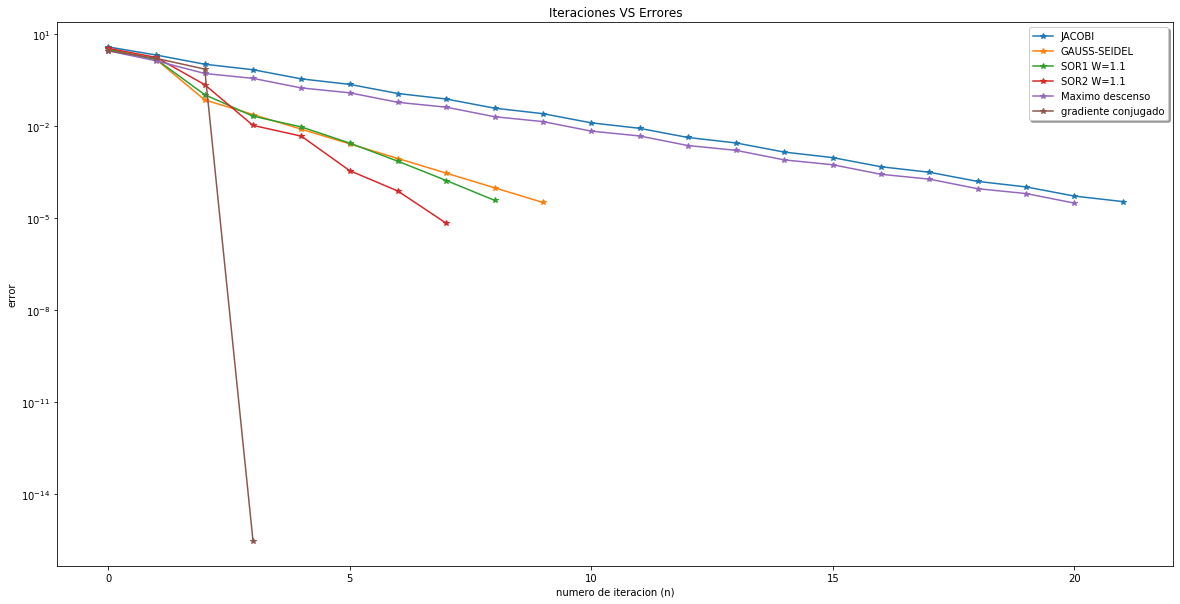

In [35]:
fig, axes = plt.subplots(nrows=1,ncols=1 , figsize = (20,10)) # fig es la figura y axes son los ejes (son elementos de cada figura)

################### Aca se resuelve para F_x = 1.56 ######################

print("-----------------Este sistema vamos a resolver con distintos metodos\n")

for i in range(0,len(b)):
    print(f'{A[i,0]}*X1 + {A[i,1]}*X2 + {A[i,2]}*X3  = {b[i,0]}')
print("\n")

########### ERRORES ##############
# Por el metodo de JACOBI
l_1 = axes.plot(range(0,len(lista_error1)) ,lista_error1,'-*',label="JACOBI")
# Por el metodo de Gauss-seidel
l_2 = axes.plot(range(0,len(lista_error2)) ,lista_error2,'-*',label="GAUSS-SEIDEL")
# Por el metodo de SOR1 
l_3 = axes.plot(range(0,len(lista_error3)) ,lista_error3,'-*',label="SOR1 W=1.1")
# Por el metodo de SOR2
l_4 = axes.plot(range(0,len(lista_error4)) ,lista_error4,'-*',label="SOR2 W=1.1")
# Por el maximo descenso 
l_5 = axes.plot(range(0,len(lista_error5)) ,lista_error5,'-*',label="Maximo descenso")
# Por el gradiente conjugado
l_6 = axes.plot(range(0,len(lista_error6)) ,lista_error6,'-*',label="gradiente conjugado")

axes.set_title("Iteraciones VS Errores")
axes.set_xlabel('numero de iteracion (n)')
axes.set_ylabel('error')
axes.set_yscale('log') # establecer en escala logaritmica 
axes.legend(loc='upper right', shadow=True) # se pone la legenda 

# Pregunta 1

In [36]:
print(" ######## PREGUNTA NUMERO 1A ############## ")
# con el dtype me aseguro que todos seran floats de 64 bits        
M = np.array( [[1,2,1],[0,-4,1],[0,0,-2]] , dtype= np.float64 )
N = np.array( [[5],[2],[4]] , dtype= np.float64 )

print("Sistema de ecuaciones a resolver del problema 1(a) . Usare el metodo de jacobi\n")
for i in range(0,len(N)):
    print(f'{M[i,0]}*x1 + {M[i,1]}*x2 + {M[i,2]}*x3 = {N[i,0]}')

k,X,lista = jacobi(M,N)

print(" ######## PREGUNTA NUMERO 1B ############## ")
# con el dtype me aseguro que todos seran floats de 64 bits        
M = np.array( [[2,0,0],[1,4,0],[4,3,3]] , dtype= np.float64 )
N = np.array( [[4],[2],[5]] , dtype= np.float64 )

print("Sistema de ecuaciones a resolver del problema 1(b). Usare el metodo gauss-seidel\n")
for i in range(0,len(N)):
    print(f'{M[i,0]}*x1 + {M[i,1]}*x2 + {M[i,2]}*x3 = {N[i,0]}')

k,X,lista = gauss_seidel(M,N)

 ######## PREGUNTA NUMERO 1A ############## 
Sistema de ecuaciones a resolver del problema 1(a) . Usare el metodo de jacobi

1.0*x1 + 2.0*x2 + 1.0*x3 = 5.0
0.0*x1 + -4.0*x2 + 1.0*x3 = 2.0
0.0*x1 + 0.0*x2 + -2.0*x3 = 4.0
se alcanzaron 4 iteraciones
la solucion a nuestro problema es 
 [[ 9.]
 [-1.]
 [-2.]]
 ######## PREGUNTA NUMERO 1B ############## 
Sistema de ecuaciones a resolver del problema 1(b). Usare el metodo gauss-seidel

2.0*x1 + 0.0*x2 + 0.0*x3 = 4.0
1.0*x1 + 4.0*x2 + 0.0*x3 = 2.0
4.0*x1 + 3.0*x2 + 3.0*x3 = 5.0
se alcanzaron 2 iteraciones
la solucion a nuestro problema es 
 [[ 2.]
 [ 0.]
 [-1.]]


# Pregunta 2

In [37]:
# encontremos para una matriz cualquiera la regla de correspondencia
def matriz_resistor(n):
    '''
    funcion que crea la matriz que resuelve el problema 
    de la resistencia con N nodos y tambien la matriz b 
    '''
    A = np.zeros(shape=(n,n), dtype=np.float64)
    # llenamos las dos primeras filas y dos primeras columnas 
    # que son particulares 
    A[0][0:4] = [3,-1,-1,0]
    A[1][0:4] = [-1,4,-1,-1]
    A[n-2][n-4:n] = [-1,-1,4,-1]
    A[n-1][n-4:n] = [0,-1,-1,3]
    # ese rango es debido a que llenamos ya la fila 0,1,n,n-1
    for i in range(2,n-2):
        for j in range(0,n):
            if j == i :
                A[i,j] = 4
                A[i,j-1] = -1
                A[i,j-2] = -1
                A[i,j+1] = -1
                A[i,j+2] = -1 
                
    # Definimos tambien el vector W 
    cola_inicial = [5,5]
    cola_final = [0]*(n-2)
    
    b = np.array(cola_inicial + cola_final,dtype=np.float64)
    b.resize((n,1)) # redimensionamos a lo que queremos
    
    return A ,b

In [38]:
print(" ######## PREGUNTA NUMERO 2 RESUELTO POR DIFERENTES METODOS ############## ")
A,b = matriz_resistor(100)


# recuerda que los argumentos se pasar por referencia y no por valor 
# por eso uso la funcion copy
print("resolviendo con el metodo de jacobi")
k,X,lista = jacobi(A.copy(),b.copy()) 

print("resolviendo con el metodo de gauss_seidel\n")
k,X,lista = gauss_seidel(A.copy(),b.copy()) 
    
print("resolviendo con el metodo de Over Relaxation\n")
k,X,lista = SOR1(A.copy(),b.copy(),w=1.1) 



print("resolviendo con el metodo de maximo descenso\n")
k,X,lista = maximo_descenso(A.copy(),b.copy(),iteraciones=4000) 

print("resolviendo con el metodo de gradiente conjugado\n")
k,X,lista = conjugate_gradient(A.copy(),b.copy()) 






 ######## PREGUNTA NUMERO 2 RESUELTO POR DIFERENTES METODOS ############## 
resolviendo con el metodo de jacobi
se alcanzaron 100 iteraciones
la solucion a nuestro problema es 
 [[4.44214931e+00]
 [4.31233660e+00]
 [4.02223488e+00]
 [3.79824191e+00]
 [3.55495730e+00]
 [3.32621850e+00]
 [3.10015735e+00]
 [2.88230373e+00]
 [2.67143033e+00]
 [2.46878841e+00]
 [2.27456847e+00]
 [2.08925113e+00]
 [1.91308877e+00]
 [1.74630421e+00]
 [1.58901681e+00]
 [1.44127450e+00]
 [1.30304675e+00]
 [1.17423376e+00]
 [1.05467061e+00]
 [9.44134137e-01]
 [8.42349474e-01]
 [7.48997175e-01]
 [6.63720330e-01]
 [5.86131719e-01]
 [5.15820794e-01]
 [4.52360408e-01]
 [3.95313166e-01]
 [3.44237329e-01]
 [2.98692196e-01]
 [2.58242926e-01]
 [2.22464756e-01]
 [1.90946611e-01]
 [1.63294107e-01]
 [1.39131951e-01]
 [1.18105776e-01]
 [9.98834390e-02]
 [8.41558282e-02]
 [7.06372226e-02]
 [5.90652627e-02]
 [4.92005802e-02]
 [4.08261436e-02]
 [3.37463697e-02]
 [2.77860531e-02]
 [2.27891594e-02]
 [1.86175245e-02]
 [1.51494991

# Pregunta 3

In [39]:
print(" ######## PREGUNTA NUMERO 3  ############## ")
# con el dtype me aseguro que todos seran floats de 64 bits   
g = 9.8
M = np.array( [[30,-20,0],[-20,30,-10],[0,-10,+10]] , dtype= np.float64 )
N = np.array( [[g],[g],[g]] , dtype= np.float64 )

print("Sistema de ecuaciones de la (pregunta 3) resuelto con el metodo de Over Relaxation\n")
for i in range(0,len(N)):
    print(f'{M[i,0]}*x1 + {M[i,1]}*x2 + {M[i,2]}*x3 = {N[i,0]}')

k,X,lista = SOR1(M,N,w=1.1)
print("Respuesta es : \n")
for i in range(0,len(X)):
    print(f'x{i+1} es : {X[i]}')

 ######## PREGUNTA NUMERO 3  ############## 
Sistema de ecuaciones de la (pregunta 3) resuelto con el metodo de Over Relaxation

30.0*x1 + -20.0*x2 + 0.0*x3 = 9.8
-20.0*x1 + 30.0*x2 + -10.0*x3 = 9.8
0.0*x1 + -10.0*x2 + 10.0*x3 = 9.8
se alcanzaron 38 iteraciones
la solucion a nuestro problema es 
 [[2.93991971]
 [3.91990942]
 [4.8999124 ]]
Respuesta es : 

x1 es : [2.93991971]
x2 es : [3.91990942]
x3 es : [4.8999124]
